# CTD Cast and Mount Temperature Data at Fogler Pinnacle

#### Updates:
#### - calling code from python file
#### - data from mount is plotted from respective time series of each cast

#### TODO:
#### - make educational
#### - add visuals
#### - maybe make subplots of the mount & casts

In [1]:
import pandas as pd
import onc
import os
import json
from typing import List, Tuple
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import helpers_1 as h1

from functools import reduce

#token = os.environ["TRICY_TOKEN"]
from dotenv import load_dotenv
load_dotenv()
token = os.getenv("ONC_TOKEN")

# Create ONC client
my_onc = onc.ONC(token)

In [2]:
# date of interest: July 11, 2023
dateFrom = "2023-07-11T17:00:00.000Z"
dateTo = "2023-07-11T22:30:00.000Z"

# fetch data for CTD casts and mounts from July 11, 2023
cast_df = h1.get_property(dateFrom, dateTo, "CF341", "CTD", "depth,temperature") # populate dataframe of entire day
mount_df = h1.get_property(dateFrom, dateTo, "FGPPN", "CTD", "temperature,oxygen")


In [3]:
# isolate cast time intervals, and deep section of each cast
cast_ints = h1.detect_cast_intervals(cast_df, 10) # isolate time intervals for each cast
deep_ints = h1.detect_deep_intervals(cast_df, 20, 60) # isolate time intervals for deep section (>= 20m)of each cast

# isolate cast 1 and 2 deep sections
deep_start1,deep_end1 = deep_ints[0]
deep_start2,deep_end2 = deep_ints[1]

cast_start1,cast_end1 = cast_ints[0]
cast_start2,cast_end2 = cast_ints[1]

# # Debugging: print intervals to console
# print("Cast intervals (UTC):")
# for cast_start, cast_end in cast_ints:
#    print(f"Start: {cast_start}, End: {cast_end}")

# print()

# print("Deep section of cast intervals (UTC):")
# for cast_start, cast_end in deep_ints:
#    print(f"Start: {cast_start}, End: {cast_end}")

## Plot cast and mount temp data overlaid

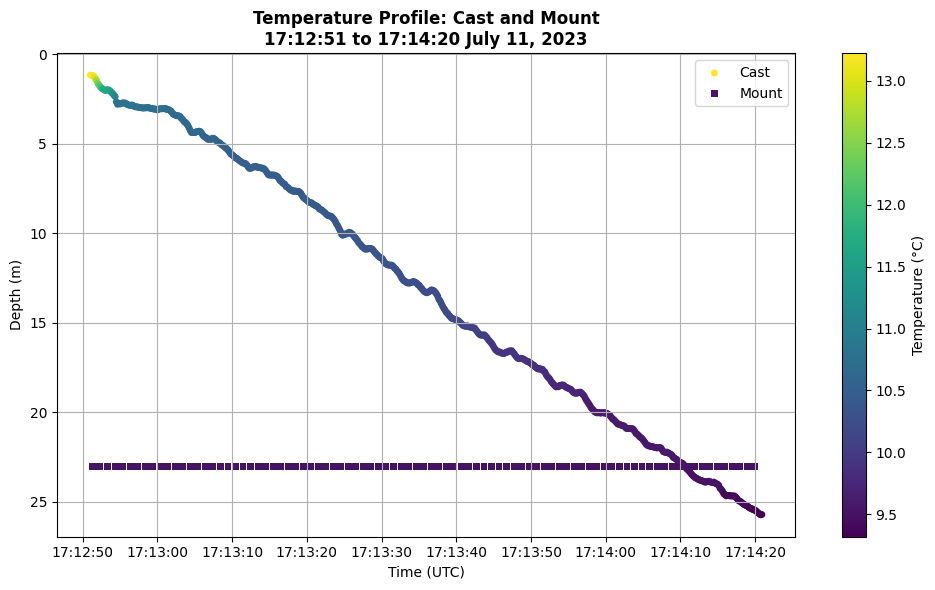

In [4]:
# Cast 1 (entire)
h1.cast_and_mount_temp_plot(start=cast_start1, end=cast_end1, cast_df=cast_df, mount_df=mount_df, mount_depth_m=23)

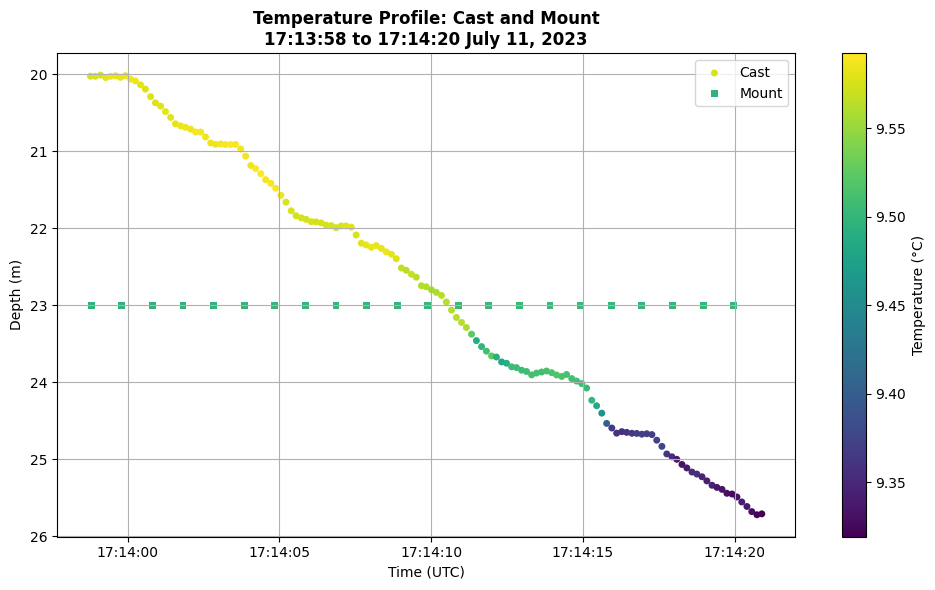

In [5]:
# Cast 1 (deep)
h1.cast_and_mount_temp_plot(start=deep_start1, end=deep_end1, cast_df=cast_df, mount_df=mount_df, mount_depth_m=23)

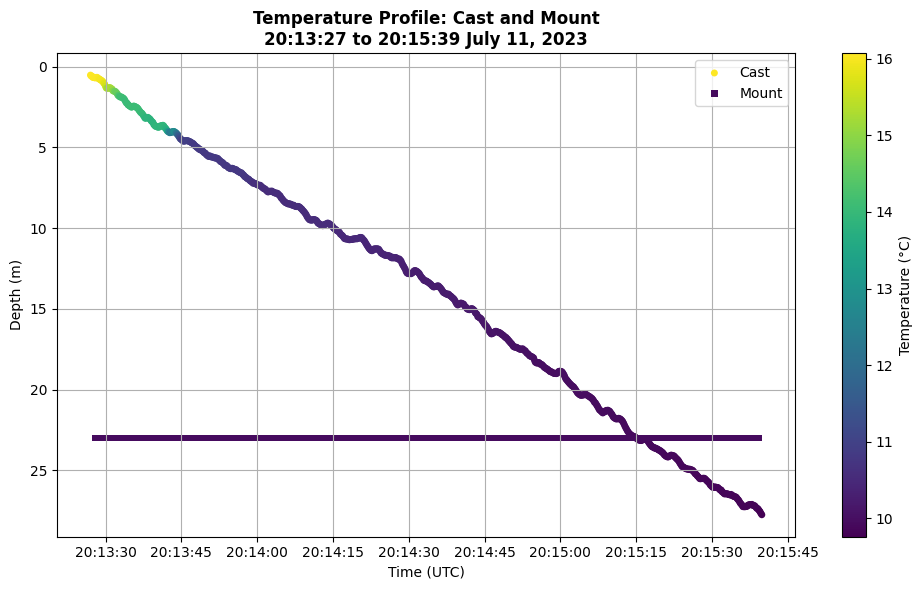

In [6]:
# Cast 2 (entire)
h1.cast_and_mount_temp_plot(start=cast_start2, end=cast_end2, cast_df=cast_df, mount_df=mount_df, mount_depth_m=23)

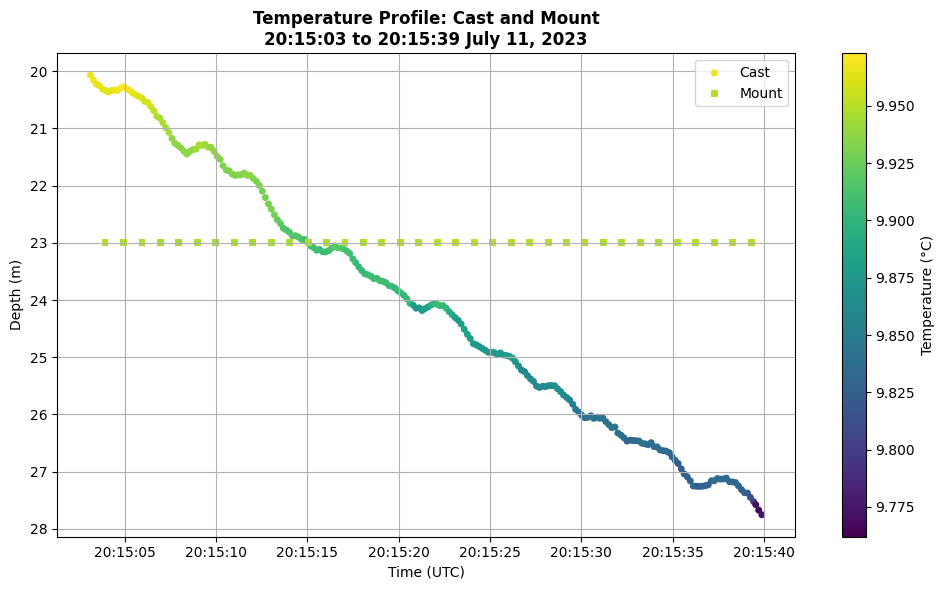

In [7]:
# Cast 2 (deep)
h1.cast_and_mount_temp_plot(start=deep_start2, end=deep_end2, cast_df=cast_df, mount_df=mount_df, mount_depth_m=23)

## Plot cast and mount temp data induvidual

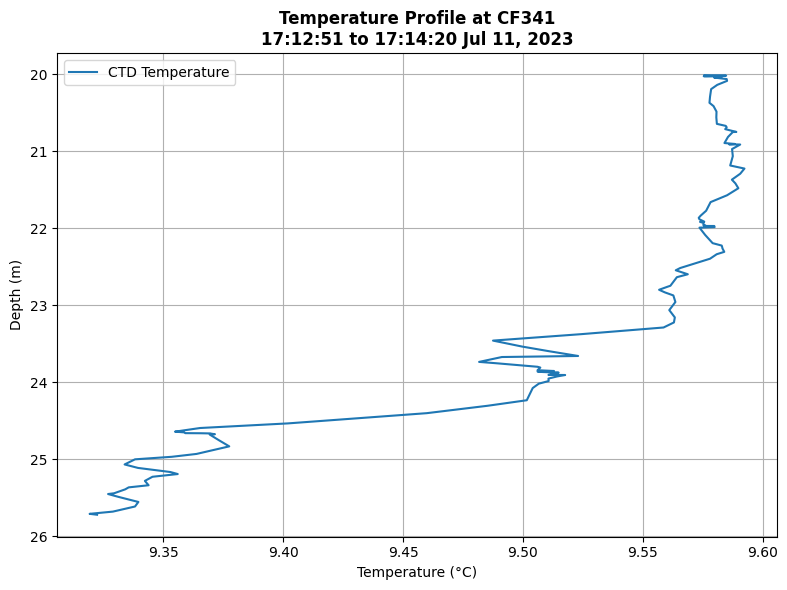

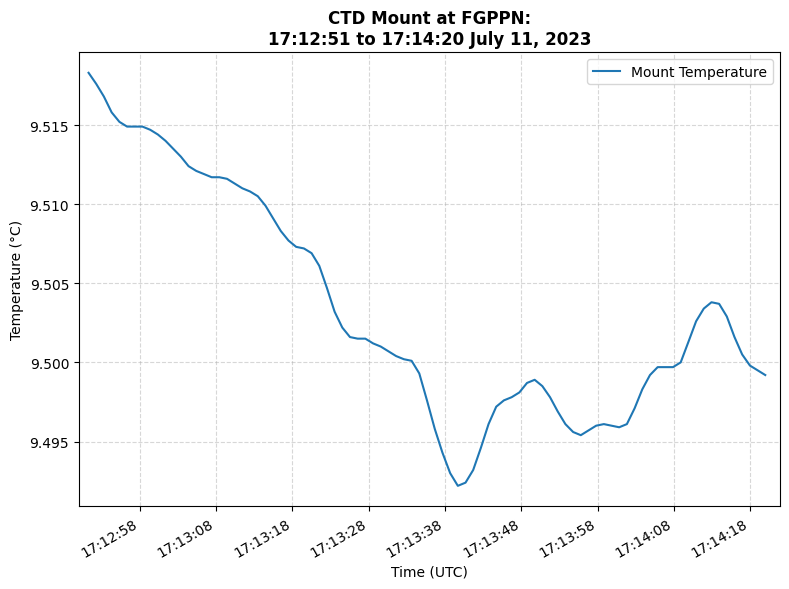

In [8]:
# Cast 1 (entire)
h1.plot_cast_depth_vs_temp(start=cast_start1, end=cast_end1, locationCode="CF341", df=cast_df, depth_threshold=20)
h1.plot_mount_temp_vs_time(start=cast_start1, end=cast_end1, locationCode="FGPPN", df=mount_df) 

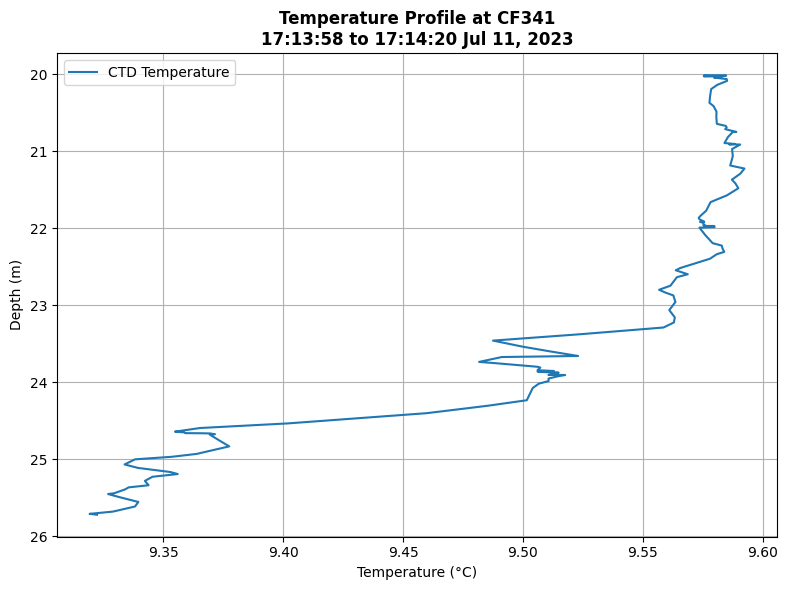

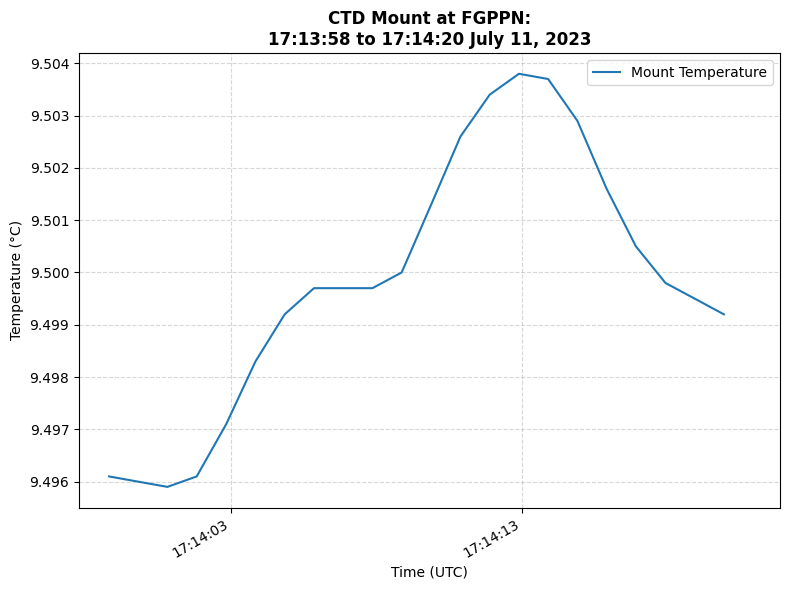

In [9]:
# Cast 1 (deep)
h1.plot_cast_depth_vs_temp(start=deep_start1, end=deep_end1, locationCode="CF341", df=cast_df, depth_threshold=20) 
h1.plot_mount_temp_vs_time(start=deep_start1, end=deep_end1, locationCode="FGPPN", df=mount_df)

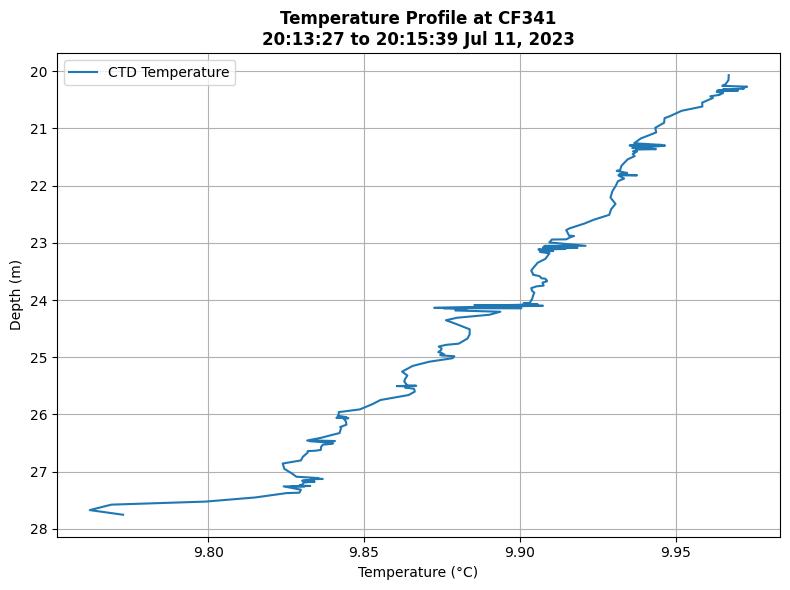

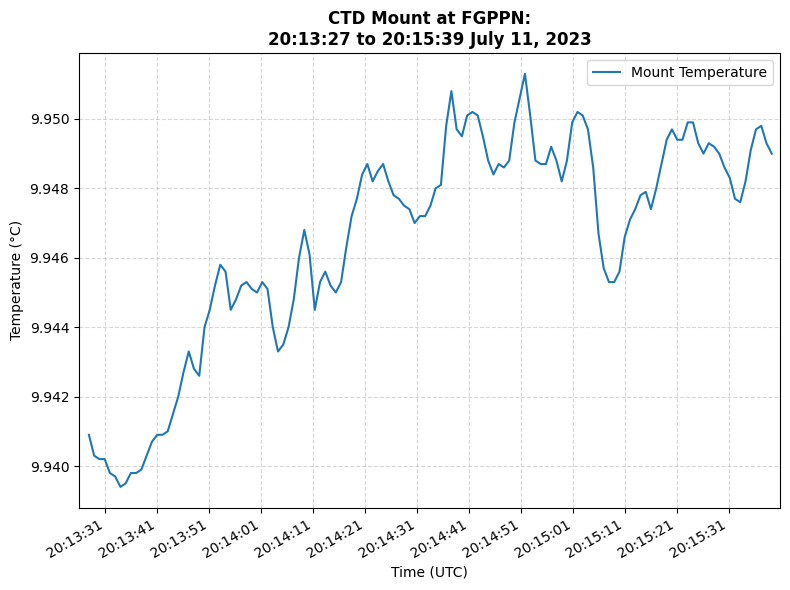

In [10]:
# Cast 1 (entire)
h1.plot_cast_depth_vs_temp(start=cast_start2, end=cast_end2, locationCode="CF341", df=cast_df, depth_threshold=20)
h1.plot_mount_temp_vs_time(start=cast_start2, end=cast_end2, locationCode="FGPPN", df=mount_df)

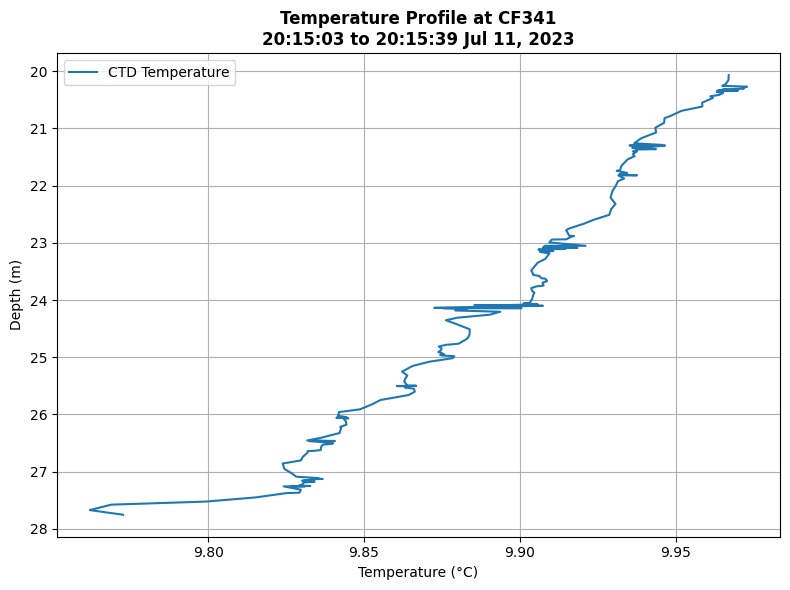

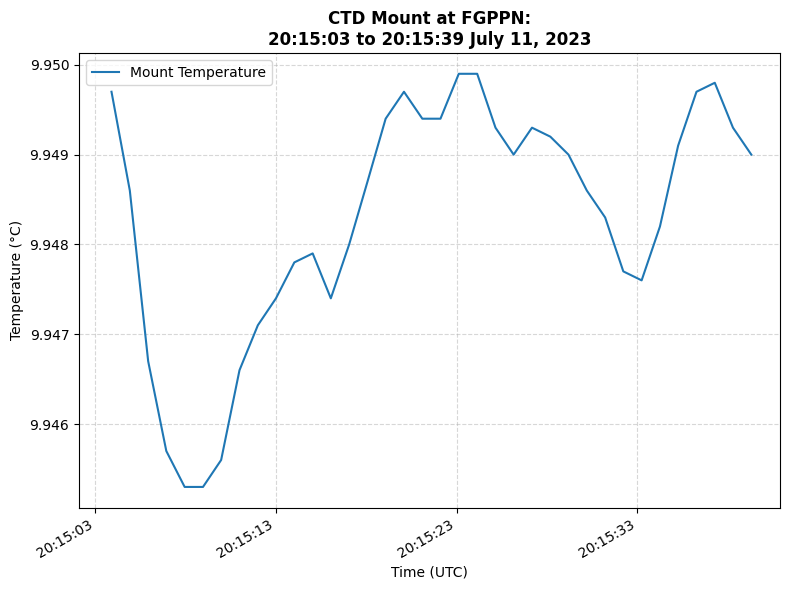

In [11]:
# Cast 2 (deep)
h1.plot_cast_depth_vs_temp(start=deep_start2, end=deep_end2, locationCode="CF341", df=cast_df, depth_threshold=20)
h1.plot_mount_temp_vs_time(start=deep_start2, end=deep_end2, locationCode="FGPPN", df=mount_df)